In [31]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
from tqdm import tqdm_notebook

from selection_game.param import Param
from selection_game.util import *

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
import matplotlib
matplotlib.style.use('classic')

# Initialize parameters

In [32]:
alpha = 0.1
sigma = np.array([0.6, 1])
p = np.array([0.5, 0.5])
S = np.array([1, 1])
C = np.array([1., 1.])

param = Param(alpha, C, S, p, sigma)

# Run simulations for S=1,10,100,1000

In [33]:
S0s = [1, 10, 100, 1000]
dt = 0.1
alphas = np.arange(dt, 1.0, dt)


for S0 in S0s:
    print ("S={}".format(S0))
    param.S = np.array([S0,S0])
    Tfps = []
    for alpha in tqdm_notebook(alphas):
        param.alpha = alpha
        Tfp = get_Tfp(param) 
        Tfps.append(Tfp)
    np.savetxt("./ttfps-S={}.csv".format(S0), Tfps)

S=1


/Users/vitalii/gitlab/strategic-selection-refactoring/selection_game/util.py:12: RuntimeWarning: invalid value encountered in sqrt
  x1 = param.sigma[G] * np.sqrt(-W1)
/Users/vitalii/gitlab/strategic-selection-refactoring/selection_game/util.py:13: RuntimeWarning: invalid value encountered in sqrt
  x2 = param.sigma[G] * np.sqrt(-W2)



S=10



S=100



S=1000


# Calculate equilibirum for all S

In [35]:
all_ress0 = {}
all_ress1 = {}
all_rates0 = {}
all_rates1 = {}
all_taus0 = {}
all_taus1 = {}



for S in tqdm_notebook(S0s):
    Tfps = np.genfromtxt("./ttfps-S={}.csv".format(S))
    param.S = np.array([S, S])
    
    
    taus0 = []
    taus1 = []
    rates0 = []
    rates1 = []
    ress0 = []
    ress1 = []
    for i, T in tqdm_notebook(enumerate(Tfps)):
        param.alpha = alphas[i]
        tau0, res0, tau1, res1 = get_ne(T, param)
        ress0.append(res0)
        ress1.append(res1)
        taus0.append(tau0)
        taus1.append(tau1)
        rates0.append([get_rate(res0[0], T, 0, param), get_rate(res0[1], T, 0, param)])
        rates1.append([get_rate(res1[0], T, 1, param), get_rate(res1[1], T, 1, param)])

    all_rates0[S] =  np.array(rates0)
    all_rates1[S] =  np.array(rates1)
    all_ress0[S] = np.array(ress0)
    all_ress1[S] = np.array(ress1)
    all_taus0[S] = np.array(taus0)
    all_taus1[S] = np.array(taus1)

/Users/vitalii/gitlab/strategic-selection-refactoring/selection_game/util.py:12: RuntimeWarning: invalid value encountered in sqrt
  x1 = param.sigma[G] * np.sqrt(-W1)
/Users/vitalii/gitlab/strategic-selection-refactoring/selection_game/util.py:13: RuntimeWarning: invalid value encountered in sqrt
  x2 = param.sigma[G] * np.sqrt(-W2)


# Fig 3a

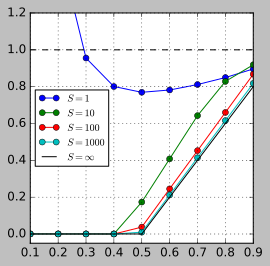

In [36]:
plt.figure(figsize=(4,4))

for S in [1, 10, 100, 1000]:
    # expected selection rates
    expx0 = (all_rates0[S] * all_taus0[S]).sum(axis=1)
    expx1 = (all_rates1[S] * all_taus1[S]).sum(axis=1) 
    plt.plot(alphas, expx1 / expx0, 'o-', label='$S={}$'.format(S), )

plt.plot(alphas[alphas <= param.p[0]], np.zeros(len(alphas))[alphas <= param.p[0]], 'k-', label='$S=\\infty$')
plt.plot(alphas[alphas >= param.p[0] - 1e-10], (alphas[alphas >= param.p[0] - 1e-10] -param.p[0])/ param.p[1] , 'k-')

plt.axhline(1, linestyle='--', color='k')

plt.ylim(-0.05, 1.2)
plt.grid()
plt.legend(loc='best', fontsize=10)
plt.savefig("./fig/disc-xs.pdf".format(param.alpha), bbox_inches='tight')